# FIFA 2018 Prediction

## Table of Contents
<ul>
<li><a href="#statement">Problem Statement</a></li>
<li><a href="#loading">Data loading and Description</a></li>
<li><a href="#profiling">Data Profiling</a></li>
<li><a href="#models and evaluation">Used Models for Prediction</a></li>
<li><a href="#prediction">Prediction</a></li>
</ul>

<a id='statement'></a>
## Problem Statement

FIFA 2018 Man of the Match Prediction

<a id='loading'></a>
## Data loading and Description

#### Importing packages and loading data  

In [35]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV as gs
from sklearn.ensemble import RandomForestClassifier as rf

import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
% matplotlib inline

# Importing training dataset using pd.read_csv
fifa_data = pd.read_csv('C:\\FIFA 2018 Statistics.csv') 

<a id='profiling'></a>
## Data Profiling

#### Understanding data

In [36]:
fifa_data.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


#### Check on missing values

In [37]:
missing_values = fifa_data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(fifa_data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Own goal Time,116,90.6250
Own goals,116,90.6250
1st Goal,34,26.5625
Free Kicks,0,0.0000
Team,0,0.0000
Opponent,0,0.0000
Goal Scored,0,0.0000
Ball Possession %,0,0.0000
Attempts,0,0.0000
On-Target,0,0.0000


1. As 'own Goal Time' and 'own goals' are having > 90% missing values, filling them with any combination will lead predictive model to false direction. 
   dropping them is the best option.
2. '1st Goal' represents 'When did the team score the 1st goal?''
   As Date when a team was formed is not given, missing values can be filled with some stats values.
   But,filling it with mean, median, mode, etc. does not seem to be informative. Thus,choose to drop this field to rather than filling it with uninformative data.



In [38]:
fifa_data.drop(['Own goal Time', 'Own goals', '1st Goal'], axis = 1, inplace= True)

#### Encoding to Binary format

In [39]:
# encode target variable 'Man of the match' into binary format
fifa_data['Man of the Match'] = fifa_data['Man of the Match'].map({'Yes': 1, 'No': 0})

In [40]:
numerical_features   = fifa_data.select_dtypes(include = [np.number]).columns
numerical_features


Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red',
       'Man of the Match', 'Goals in PSO'],
      dtype='object')

#### Bivariate Analysis - Understanding correlation 

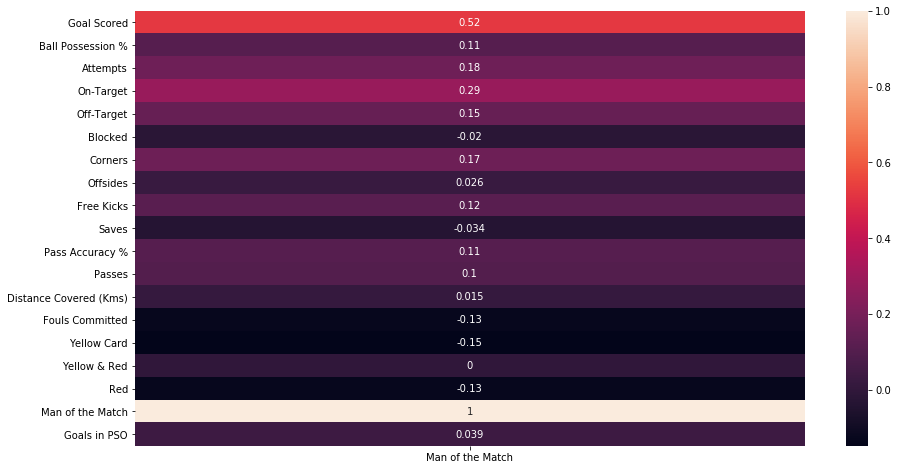

In [41]:
#Understanding Correlation 
corr = fifa_data.corr()
corr = corr.filter(items = ['Man of the Match'])
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

- 'Man of the Match' is highly correlated with 'Goal Scored', 'On-Target', 'Corners', 'Attempts', 'free Kicks', 'Yellow Card', 'red', 'Fouls Committed'.
- Pass Highly correlated with Pass Accuracy %
- passes slightly correlated with 'Ball possession %
- Passes highly correlated with 'Attempts'
- Goals in PSO slightly correlated with DIstance Covered (Kms)
- These features have least or no correlation with 'Man of the Match'
    - ['Blocked', 'OffSides', 'Saves','Distance Covered (Kms)', 'Yellow & Red','Goals in PSO']
    - These features will not have impact on aur analysis.

Understanding relations of each of above 8 features ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'free Kicks', 'Yellow Card', 'red', 'Fouls Committed'] with respect to 'Man of the match' closely using scatter plot, box plot etc.

Scatter plot is another great tool to see correlation degree and direction among features.Also using seaborn pairplot makes this task easy for us by plotting all possible combinations.

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


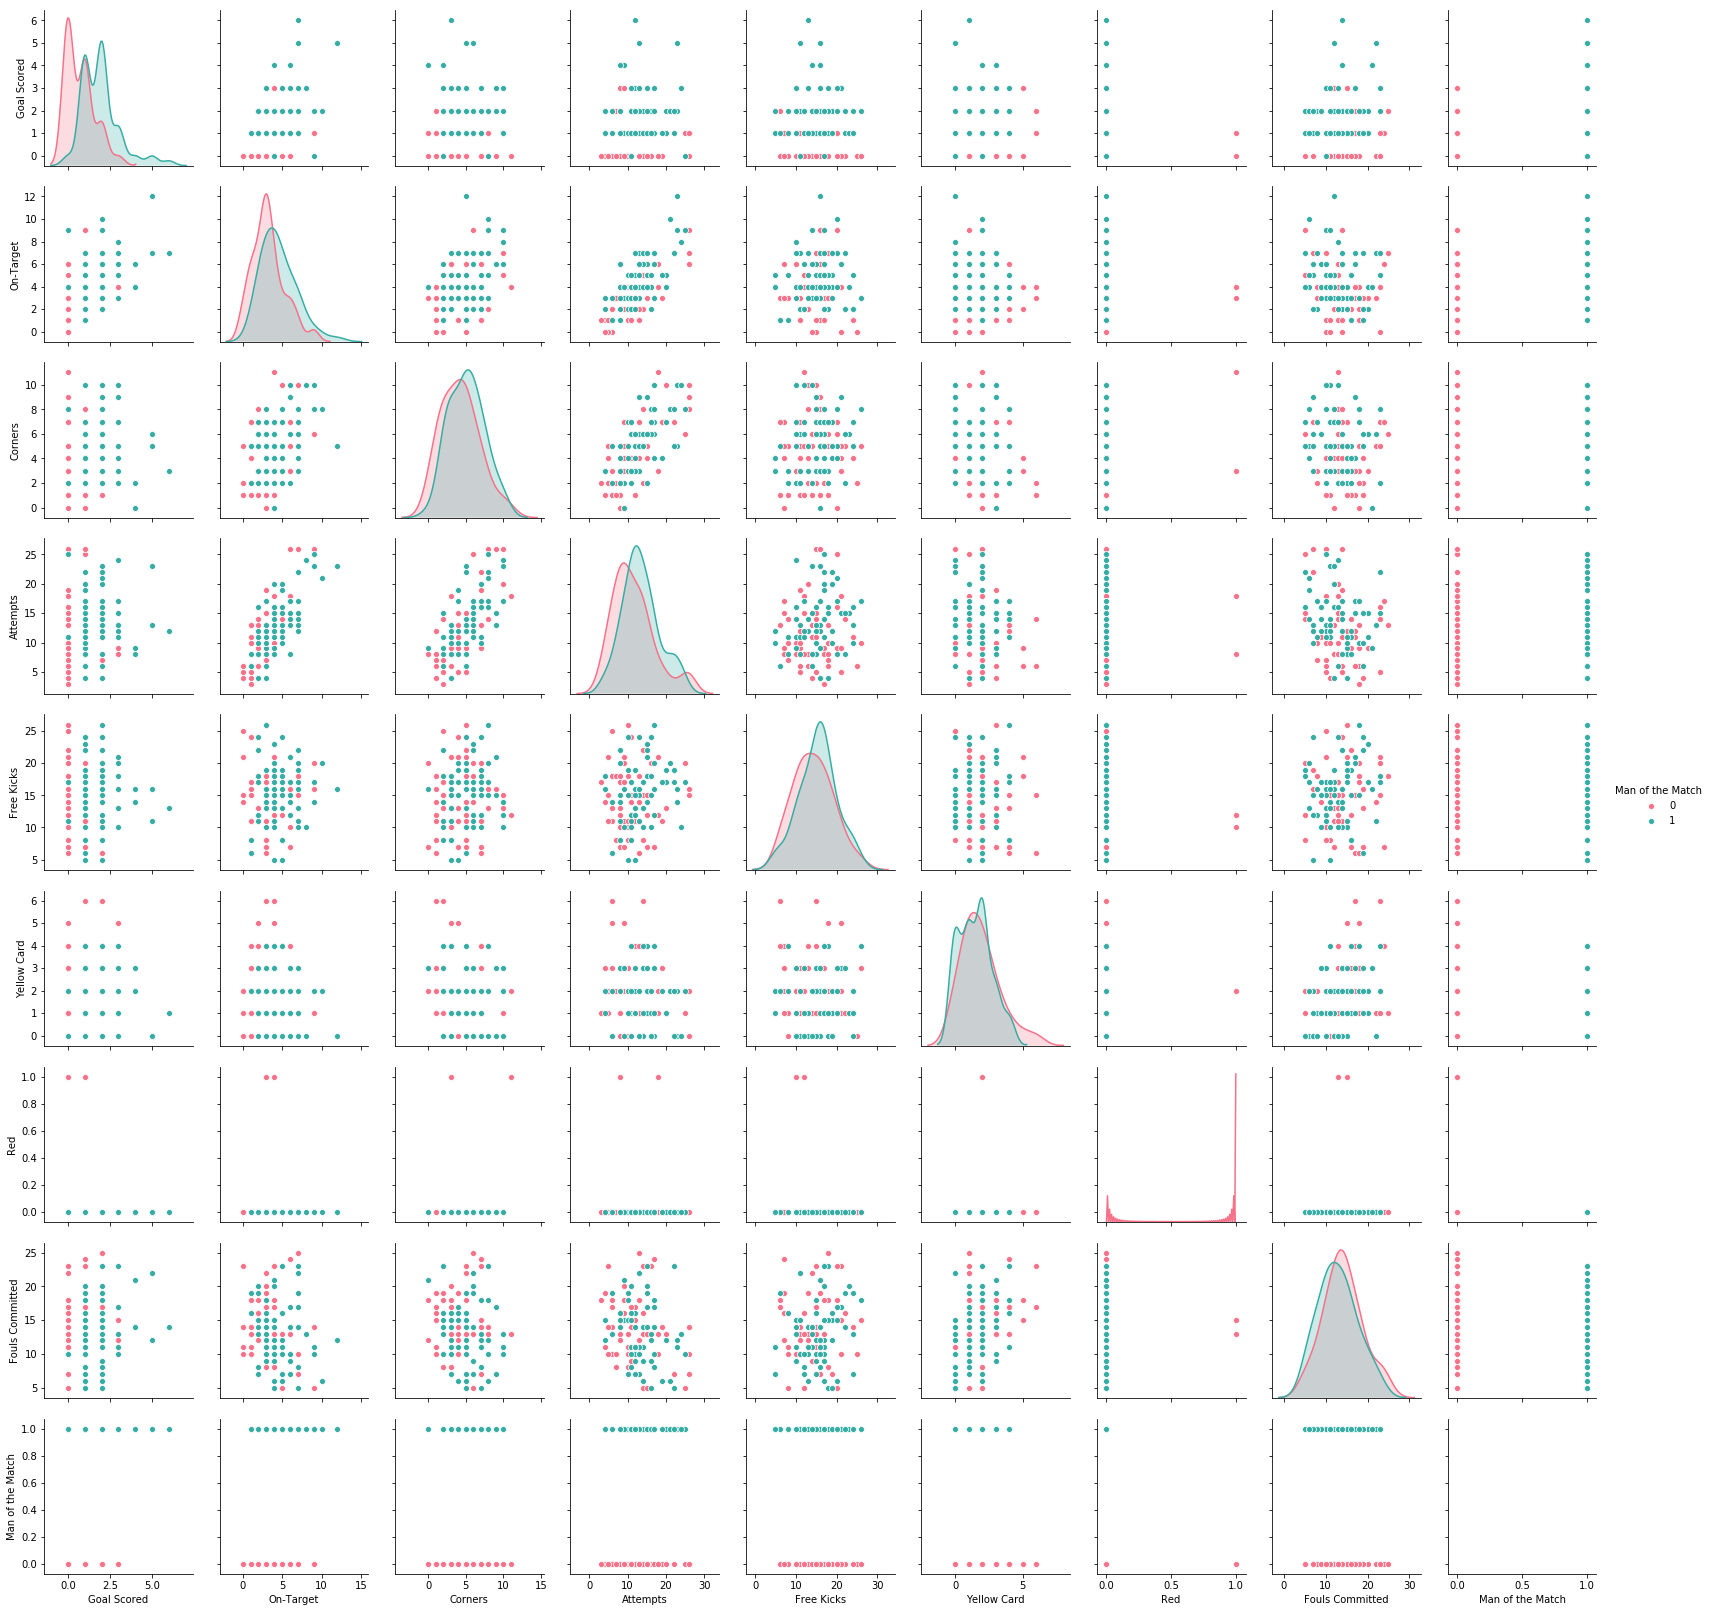

In [42]:
var1 = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 'Fouls Committed']
var1.append('Man of the Match')
sns.pairplot(fifa_data[var1], hue = 'Man of the Match', palette="husl")
plt.show()

- As I can notice 'Attempts' is linearly proportional to 'On-Target' and 'Corners'
- 'Corners' and 'On-Targets' are also linearly positively proportional

#### Outliers Detection

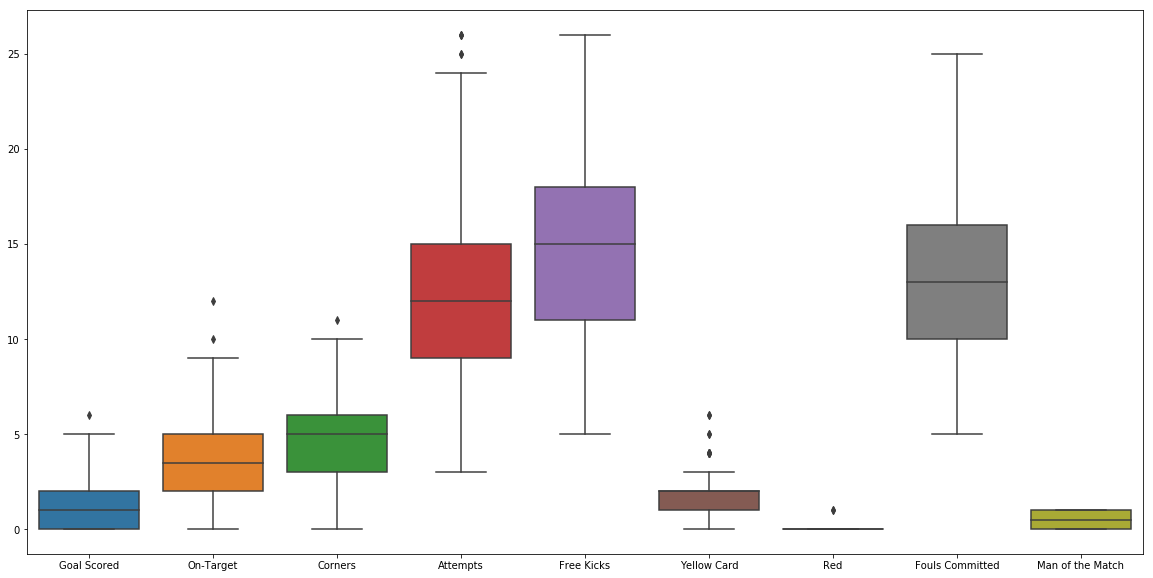

In [43]:
#Outliers Detection

dummy_data = fifa_data[var1]
plt.figure(figsize=(20,10))
sns.boxplot(data = dummy_data)
plt.show()

- As per boxplot there are :
    - 1 outlier in Goal scored, 2 in On-Target,1 in corners,2 in Attempts,3 in Yellow Card,1 in Red
- In simple words, for a normally distributed data any value that lies beyond range of 1.5 times IQR (Inter quartile range) is considered to be an outliers.
- The quantity of outliers present in this problem is not too huge and will not have gravity impact if left untreated. They are only few and within range.

#### Categorical Features Encoding

- As machine learning models understand only numbers data in different formats including text and dates needs to be mapped into numbers prior to feeding to the model
- The process of changing non-numerical data into numerical is called 'Encoding'

In [44]:
categorical_features = fifa_data.select_dtypes(include= [np.object]).columns
categorical_features

Index(['Date', 'Team', 'Opponent', 'Round', 'PSO'], dtype='object')

#### Dropping Columns

In [45]:
#'Match date' as it should definately not impact a player formance.

fifa_data.drop('Date', axis = 1, inplace=True)

In [46]:
#'Round' should also not have any impact on 'Man of the Match' because, a player performance should be consistent over all matches to become man of the match than just in a particular round

fifa_data.drop('Round', axis = 1, inplace=True)

In [47]:
#"Corners', 'Fouls Committed' and 'On-Targets' , these features are selected based on their low collinearity with 'Man of the Match' and high collinearity with other features.
fifa_data.drop(['Corners', 'Fouls Committed', 'On-Target'], axis = 1, inplace=True)

#### Dummification of remaining categorical features

In [48]:
cleaned_data  = pd.get_dummies(fifa_data)
print(cleaned_data.shape)

cleaned_data.head()

(128, 82)


,Goal Scored,Ball Possession %,Attempts,Off-Target,Blocked,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,...,Opponent_Saudi Arabia,Opponent_Senegal,Opponent_Serbia,Opponent_Spain,Opponent_Sweden,Opponent_Switzerland,Opponent_Tunisia,Opponent_Uruguay,PSO_No,PSO_Yes
0,5,40,13,3,3,3,11,0,78,306,...,1,0,0,0,0,0,0,0,1,0
1,0,60,6,3,3,1,25,2,86,511,...,0,0,0,0,0,0,0,0,1,0
2,0,43,8,3,2,1,7,3,78,395,...,0,0,0,0,0,0,0,1,1,0
3,1,57,14,6,4,1,13,3,86,589,...,0,0,0,0,0,0,0,0,1,0
4,0,64,13,6,4,0,14,2,86,433,...,0,0,0,0,0,0,0,0,1,0


<a id='models and evaluation'></a>
## Models For Prediction

In [49]:
fifa_y = cleaned_data['Man of the Match']
fifa_x = cleaned_data.drop('Man of the Match', axis = 1)
fifa_x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 81 columns):
Goal Scored                128 non-null int64
Ball Possession %          128 non-null int64
Attempts                   128 non-null int64
Off-Target                 128 non-null int64
Blocked                    128 non-null int64
Offsides                   128 non-null int64
Free Kicks                 128 non-null int64
Saves                      128 non-null int64
Pass Accuracy %            128 non-null int64
Passes                     128 non-null int64
Distance Covered (Kms)     128 non-null int64
Yellow Card                128 non-null int64
Yellow & Red               128 non-null int64
Red                        128 non-null int64
Goals in PSO               128 non-null int64
Team_Argentina             128 non-null uint8
Team_Australia             128 non-null uint8
Team_Belgium               128 non-null uint8
Team_Brazil                128 non-null uint8
Team_Colombia        

In [55]:
xtrain, xtest, ytrain, ytest = train_test_split(fifa_x, 
                                                fifa_y, 
                                                random_state = 42, 
                                                test_size = .2)

#### 1. Logistic Regression and Evaluation

In [56]:
#log_reg = LogisticRegression(C=1,penalty="l2")
#log_reg.fit(xtrain, ytrain)
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=gs(logreg,grid,cv=10)
logreg_cv.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
preds = logreg_cv.predict(xtest)
print(confusion_matrix(ytest, preds))
print('Test accuracy: ', accuracy_score(ytest,preds))

[[ 9  2]
 [ 4 11]]
Test accuracy:  0.7692307692307693


#### 2. RandomForest Classifier And Evaluation

In [80]:
rand_for = rf()

grid = {'n_estimators': [100,150],
        'max_depth' : [10],
        'criterion': ['gini', 'entropy'],
        'random_state' : [69]}

grid_rand = gs(rand_for, grid, cv = 10)

grid_rand.fit(xtrain, ytrain)


{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100, 'random_state': 69}

In [81]:
preds = grid_rand.predict(xtest)
print(confusion_matrix(ytest, preds))
print('Test accuracy: ', accuracy_score(ytest,preds))

[[ 9  2]
 [ 5 10]]
Test accuracy:  0.7307692307692307


#### 3.DecisionTree Classifier And Evaluation

In [97]:
# Decision Tree
decision_tree_classifier = DecisionTreeClassifier(random_state = 0)

tree_para = [{'criterion':['gini','entropy'],'max_depth':range(10,20),
                             'max_features': ['sqrt', 'log2'] }]
                            
                            

grid_search = gs(decision_tree_classifier,tree_para, cv=15,refit='AUC')
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=15, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': range(10, 20), 'max_features': ['sqrt', 'log2']}],
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring=None, verbose=0)

In [98]:
preds = grid_search.predict(xtest)
print(confusion_matrix(ytest, preds))
print('Accuracy score for test data is:', accuracy_score(ytest,preds))

[[10  1]
 [ 7  8]]
Accuracy score for test data is: 0.6923076923076923


<a id='prediction'></a>
## Prediction

Logistic Regressor was 76.9% accurate as compared to others models used for prediction .